# LIBRARIES

In [996]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import uniform,randint

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler, PolynomialFeatures
from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split, learning_curve
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier, EasyEnsembleClassifier, BalancedRandomForestClassifier

import joblib

import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

# REPORT & CONCLUSION

## Customer Churn Report

### 1.1) Encoding
To ensure coherence, I created a robust and consistent preprocessing procedure to encode the training and test subsets in the same way.

### 1.2) Evaluation Process
Similarly, I developed a shared evaluation process to iterate through my models and identify the best-performing ones. To speed up the tuning process, I also created a light evaluation procedure.

### 1.3) Modeling
Given the classification problem at hand, **customer churn**, I chose to prioritize recall in my model tuning. For a business, minimizing false negatives (not identifying a churning customer) is crucial, as each churned customer results in a significant loss of revenue.

Noting the imbalance in the target class, I selected several models well-suited for imbalanced classification problems, including:

- **BalancedRandomForest**
- **EasyEnsembleClassifier**
- **BalancedBagging**
  
Additionally, I included simple and interpretable models like **Logistic Regression**, models that perform well on relatively small datasets like **Support Vector Classifier (SVC)**, and more general ensemble boosting and bagging models like **AdaBoost, RandomForestClassifier, and BaggingClassifier**.

After one iteration with minimal parameter tuning (only the balanced option was activated), I selected five models based on recall to proceed with further tuning:

- **BalancedRandomForest**
- **EasyEnsembleClassifier**
- **BalancedBagging**
- **SVC**
- **LogisticRegression** (performed very well, which is not entirely surprising given the quality of the data)

Feature engineering didn't significantly improve model performance. However, to simplify learning, I grouped all internet optional services into a new feature called "InternetServicesOptions".

Next, I adopted a two-way approach:

#### First Approach: Single Best Model with Parameter Tuning

- **Advantages:**
    - Simplicity
    - Better interpretability
    - Easier and faster tuning

</tr>

- **Disadvantages:**
    - Less flexible
    - More limited for improvement
    - Less complexity and precision

</tr>

- **Conclusion**:
    - **LogisticRegression** with default settings performed the best. It was possible, with threshold adjustments, to achieve a recall between 0.8 and 0.9 with respective F1 scores of 0.61 and 0.57. This means that 80-90% of churning customers were detected, meeting the goal of minimizing false negatives.
    - The downside of prioritizing recall is that it lowers overall accuracy, leading to more false positives (predicting churn for customers who are not churning).
    - From a business perspective, this means taking actions and using resources to retain already loyal customers. To control this effect, I added a decision threshold to tune the model's sensitivity.

#### Second Approach: Ensemble of Top 5 Models with Parameter Tuning

- **Advantages:**
    - More flexibility
    - Greater potential for improvement
    - Better precision

</tr>

- **Disadvantages:**
    - More complex
    - Slower tuning process
    - Lower interpretability

</tr>

- **Conclusion:**
    - Results were about the same as LogisticRegression. The complexity, slowness, and lack of interpretability did not justify the effort.

</tr>

### 1.4) Deployment
Finally, for educational purposes, I created a joblib file and defined a wrapper class for deployment. The goal was to demonstrate quick and easy deployment of the final tuned model inside another Jupyter notebook.



## Possible Solutions to Improve Model Performance

- **More Quality Data**: Considering the learning curve, more quality data to train the model could lead to better results. For instance, field data like the number of calls each client had with the support service or a rating given to support or services.

- **Other Feature Engineering strategy**: Create new features from existing data that may capture important patterns. For example, creating interaction terms.

- **Other Ensemble Methods**: Combine predictions from others models to improve overall performance (linear SVC, KNN, Gaussian).

- **Data Augmentation**: Generate synthetic data using techniques like SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance.

- **Dimensionality Reduction**: Apply PCA (Principal Component Analysis) or other dimensionality reduction techniques to reduce the feature space and remove noise.

- **Regularization**: Use regularization techniques (L1, L2) to prevent overfitting and improve model robustness.

- **Temporal Analysis**: Incorporate time-based features or trends to capture seasonal patterns and customer behavior over time.

- **Automated Machine Learning (AutoML)**: Utilize AutoML tools to automate the process of model selection, hyperparameter tuning, and feature engineering.

## Possible Business Solutions to Improve Customer Churn

### Proactive Customer Management

1) Create Procedures for Risky Clients Based on Their Situation:
    - Develop specific protocols for different categories of clients who are at risk of churning.

</tr>

2) Warning for High-Risk Clients:
    - Implement a warning system to flag high-risk clients and take proactive measures to retain them.

</tr>

3) Early Intervention Programs:
    - Implement early intervention programs to address potential issues before they lead to churn.

### Incentives and Rewards

1. Incentives for New Customers:
    - Provide incentives during the first 2-3 years when churning is more probable (discounts, special benefits, introductory offers).

</tr>

2. Incentives for High-Paying Customers:
    - Offer loyalty incentives for high-paying customers (special packages, discounts, special benefits).
    - Enhance services to better match customer needs (personalized advice for suitable services).

</tr>

3) Quick Survey with Incentives:
    - Conduct quick surveys and offer benefits to those who participate (e.g., random draw for valuable prizes like an iPhone).

</tr>
  
4) Loyalty Programs:
    - Develop loyalty programs that reward long-term, (high paying) customers with exclusive benefits.
  
</tr>

5)  Tailored Offers and Promotions:
    - Provide tailored offers and promotions based on customer usage patterns and preferences.


### Customer Engagement and Support

1) Engage Unhappy/Complaining Customers:
    - Proactively reach out to unhappy or complaining customers to address their issues.
    - Offer solutions or be honest about limitations if no immediate solutions are available.

</tr>

2) Enhanced Customer Support:
    - Improve customer support with shorter response times, knowledgeable staff, and effective problem resolution.

</tr>

3) Customer Success Teams (for business):
    - Establish customer success teams dedicated to ensuring customers achieve their desired outcomes with your services.

</tr>

4) Personalized Communication :
    - Use personalized communication strategies to make customers feel valued and understood.

</tr>

5) Customer Feedback Loop:
    - Implement a robust feedback loop to continuously gather and act on customer feedback.

### Service and Product Improvement

1) Service Quality Improvement:
    - Continuously monitor and improve the quality of services provided to ensure customer satisfaction.

</tr>

2) Customer Education:
    - Educate customers on how to get the most out of their services through tutorials, webinars, and support materials.
  
### Data-Driven Strategies

1) Predictive Analytics:
    - Use predictive analytics to identify new patterns that lead to churn and address them proactively.


### Flexibility and Customization

1) Flexible Contract Options:
    - Offer flexible contract options to meet diverse customer needs and reduce the risk of churn.

</tr>

2) Tailored Offers and Promotions:
    - Provide tailored offers and promotions based on customer usage patterns and preferences.
with your services.

# PRE-PROCESSING 

## 1) Train-Test split

In [ ]:
# Load data
data = pd.read_csv('raw_data.csv')
df = data.copy()

# Data Cleaning
df = df.fillna(0)
df = df.drop(['customerID'], axis = 1)
df['TotalCharges']= pd.to_numeric(df.TotalCharges, errors ='coerce')
df['SeniorCitizen']= df['SeniorCitizen'].astype('object') 

In [473]:
# Create a Train and Test set for encoding
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

## 2) Encoding 

In [967]:
def encodage(df):

    #Separate target, categorical and numerical features
    target = df['Churn']
    df = df.drop('Churn', axis=1)
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    #Encode categorical features
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_categorical = pd.DataFrame(encoder.fit_transform(df[categorical_features]))
    encoded_categorical.columns = encoder.get_feature_names_out(categorical_features)

    #Scale numerical features (StandardScaler gives better recall with similar F1)
    scaler = StandardScaler()
    scaled_numerical = scaler.fit_transform(df[numerical_features])
    scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical_features)

    #Encode target with LabelEncoder
    label_encoder = LabelEncoder()
    encoded_target = label_encoder.fit_transform(target)
    encoded_target = pd.Series(encoded_target, name='Churn_encoded')

    #Combine preprocess data into a single dataframe
    df = pd.concat([encoded_categorical, scaled_numerical, encoded_target], axis=1)
    
    #Replace columns label space with underscore
    df.columns = df.columns.str.replace(' ','_')

    
    return df
    

In [969]:
def feature_engineering(df):
    
    df['total_internet_services'] = df[['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']].sum(axis=1)
    
    df = df.drop(['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'], axis=1)

    scaler = StandardScaler()
    df['total_internet_services'] = scaler.fit_transform(df[['total_internet_services']])
    
    return df

In [742]:
def imputation(df) : 
    df = df.drop(Less_important_features, axis =1)
    return df

In [1068]:
def preprocessing(df):
    df = encodage(df)
    df = feature_engineering(df)
    #df = imputation(df) >> no sgnificant improvement
    
    X = df.drop('Churn_encoded', axis=1)
    y = df['Churn_encoded']

    print(y.value_counts())
    
    return X, y

In [1071]:
# Preprocessing of the test and train set with the same procedure
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

# Encoded dataset (X_train) for checking 
X_train

Churn_encoded
0    4133
1    1501
Name: count, dtype: int64
Churn_encoded
0    1041
1     368
Name: count, dtype: int64


,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No_phone_service,MultipleLines_Yes,InternetService_Fiber_optic,InternetService_No,OnlineSecurity_No_internet_service,...,Contract_One_year,Contract_Two_year,PaperlessBilling_Yes,PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,tenure,MonthlyCharges,TotalCharges,total_internet_services
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.612532,0.674154,1.704761,2.139710
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.747907,-0.614894,-0.709771,-0.021869
2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.571835,-1.335097,-0.208672,-1.102658
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.025340,0.301578,0.053140,1.058920
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.595101,1.128231,0.990579,1.058920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.707210,1.284580,-0.327908,1.058920
5630,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.910696,0.873748,-0.581331,0.518526
5631,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.042771,-1.466497,-0.483740,-1.102658
5632,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-1.276971,0.163525,-0.975304,-1.102658


In [1000]:
# Save X_test to a file
joblib.dump(X_test, 'X_test.pkl')

# Save Y_test to a file
joblib.dump(y_test, 'y_test.pkl')

# Save X_test to a file
joblib.dump(X_train, 'X_train.pkl')

# Save Y_test to a file
joblib.dump(y_train, 'y_train.pkl')

['y_train.pkl']

## 3) Evaluation process

In [965]:
def light_evaluation (model, estimator_name) : 
   
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Results for {estimator_name}:")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    
    # Print confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

  

In [975]:
def evaluation (model, estimator_name) : 
   
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Results for {estimator_name}:")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    
    # Print confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {estimator_name}')
    plt.show()
 
    # Learning curve
    N, train_scores, val_scores = learning_curve(
        model, 
        X_train, 
        y_train, 
        cv=10,
        train_sizes = np.linspace(0.1,1,10))
    
    # Plot learning curve
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_scores.mean(axis=1), label='Train score')
    plt.plot(N, val_scores.mean(axis=1), label='Validation score')
    plt.title(f"Learning Curve for {estimator_name}")
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

In [990]:
def feature_selection (model, estimator_name) : 
   
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Results for {estimator_name}:")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    
    # Print confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    #Visualize important features
    print("\nFeature_importance:")
    pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))
    plt.title(f"Feature Importances - {estimator_name}")
    plt.show()

    # Create a variable for less important feature
    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    Less_important_features = feature_importances[feature_importances < 0.01].index
    print(f'\nLess_important_features : {Less_important_features}')

# MODELING

## 1) Features Selection (no improvement)

Results for RandomForest:

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1041
           1       0.59      0.47      0.52       368

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409


Confusion Matrix:
[[921 120]
 [196 172]]

Feature_importance:


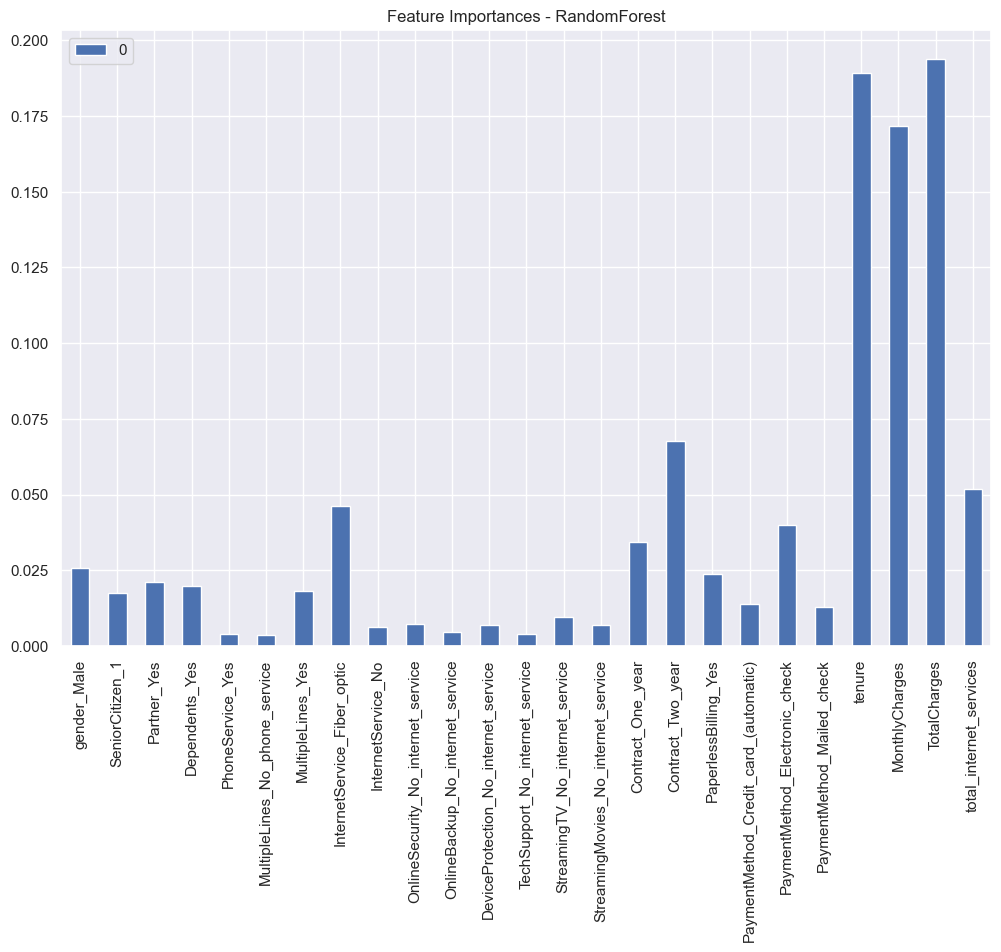


Less_important_features : Index(['PhoneService_Yes', 'MultipleLines_No_phone_service',
       'InternetService_No', 'OnlineSecurity_No_internet_service',
       'OnlineBackup_No_internet_service',
       'DeviceProtection_No_internet_service',
       'TechSupport_No_internet_service', 'StreamingTV_No_internet_service',
       'StreamingMovies_No_internet_service'],
      dtype='object')
Results for BalancedRandomForestClassifier:

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1041
           1       0.49      0.76      0.60       368

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.75      1409


Confusion Matrix:
[[753 288]
 [ 90 278]]

Feature_importance:


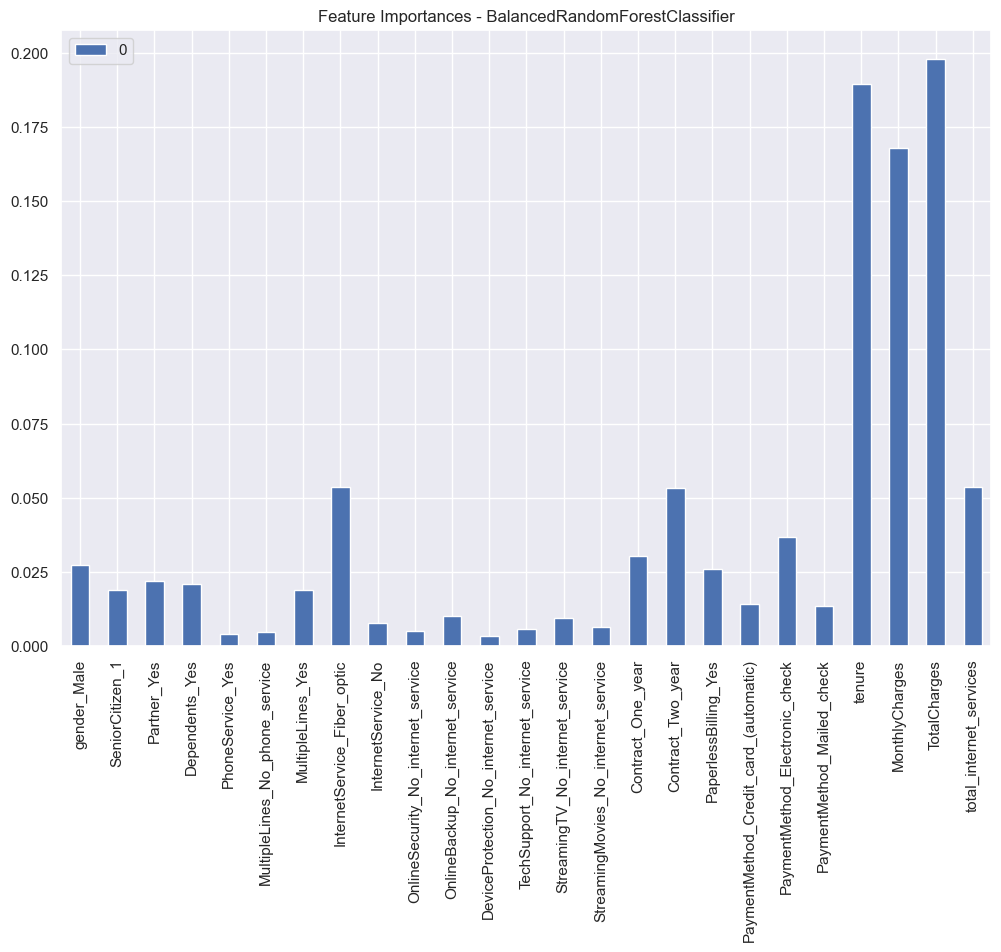


Less_important_features : Index(['PhoneService_Yes', 'MultipleLines_No_phone_service',
       'InternetService_No', 'OnlineSecurity_No_internet_service',
       'DeviceProtection_No_internet_service',
       'TechSupport_No_internet_service', 'StreamingTV_No_internet_service',
       'StreamingMovies_No_internet_service'],
      dtype='object')


In [991]:
# Features Selection
RF = RandomForestClassifier(random_state=0, class_weight = 'balanced')
BRF = BalancedRandomForestClassifier(random_state=0)


features_importance =  {'RandomForest': RF,
                       'BalancedRandomForestClassifier': BRF}

for name, model in features_importance.items(): 
    feature_selection(model,name)

## 2) Models selection (recall score)

In [984]:
# Evaluation of models and preprocessing (light)

# Create a preprocessor pipeline
# preprocessor = make_pipeline (PolynomialFeatures(2, include_bias=False), >> no improvement
                              #SelectKBest(f_classif, k=20))

# Define models
EEC = make_pipeline(EasyEnsembleClassifier(random_state=0))
BRF = make_pipeline(BalancedRandomForestClassifier(random_state=0))
BBC = make_pipeline(BalancedBaggingClassifier(random_state=0))
SVM = make_pipeline(SVC(class_weight='balanced', probability=True, random_state=0))
LR = make_pipeline(LogisticRegression(class_weight='balanced', random_state=0))
#RF = RandomForestClassifier(random_state=0, class_weight = 'balanced')  >> low recall score
#AdB = AdaBoostClassifier(random_state=0)                           >> low recall score

dict_models = {
    'EasyEnsembleClassifier': EEC,
    'BalancedRandomForest': BRF,
    'BalancedBagging': BBC,
    'SupportVector': SVM,
    'LogisticRegression': LR,
    #'RandomForestClassifier': RF,
    #'AdaBoostClassifier': AdB,
    
}

for name, model in dict_models.items(): 
    light_evaluation(model,name)

Results for EasyEnsembleClassifier:

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1041
           1       0.49      0.78      0.60       368

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409


Confusion Matrix:
[[747 294]
 [ 81 287]]
Results for BalancedRandomForest:

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1041
           1       0.49      0.76      0.60       368

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.75      1409


Confusion Matrix:
[[753 288]
 [ 90 278]]
Results for BalancedBagging:

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79   

Results for EasyEnsembleClassifier:

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1041
           1       0.49      0.78      0.60       368

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409


Confusion Matrix:


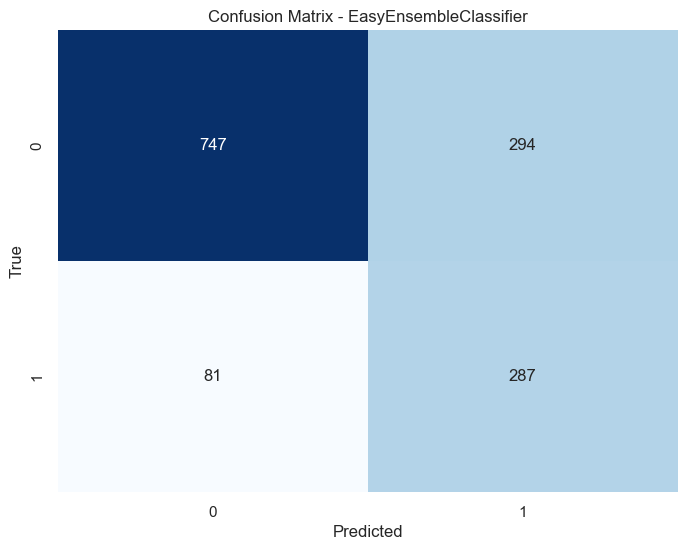

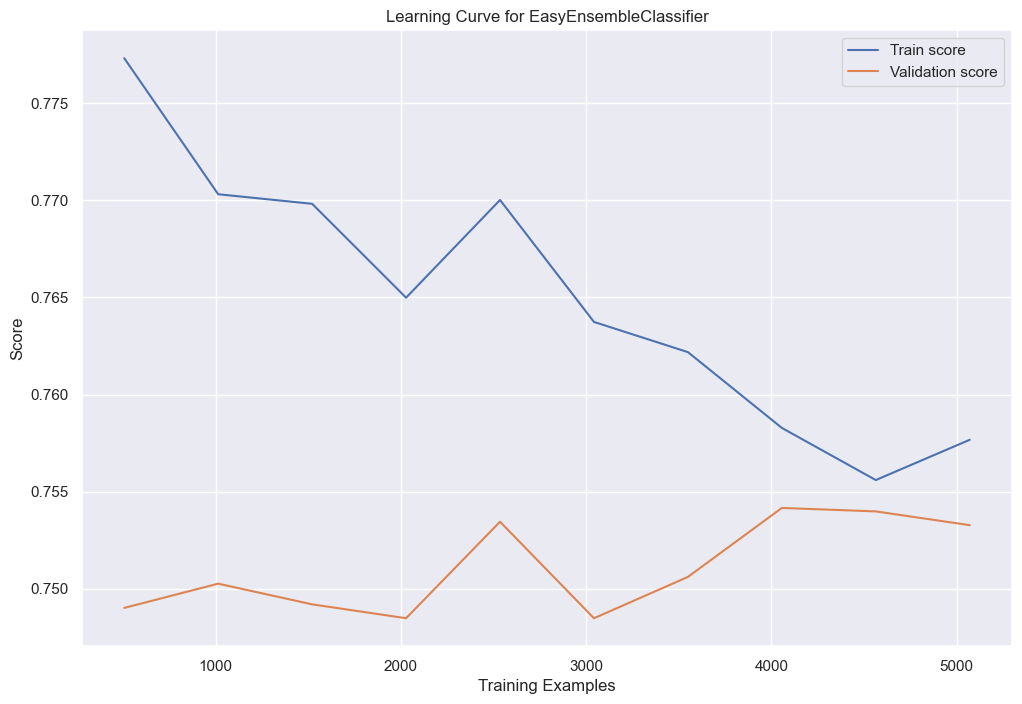

Results for BalancedRandomForest:

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1041
           1       0.49      0.76      0.60       368

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.75      1409


Confusion Matrix:


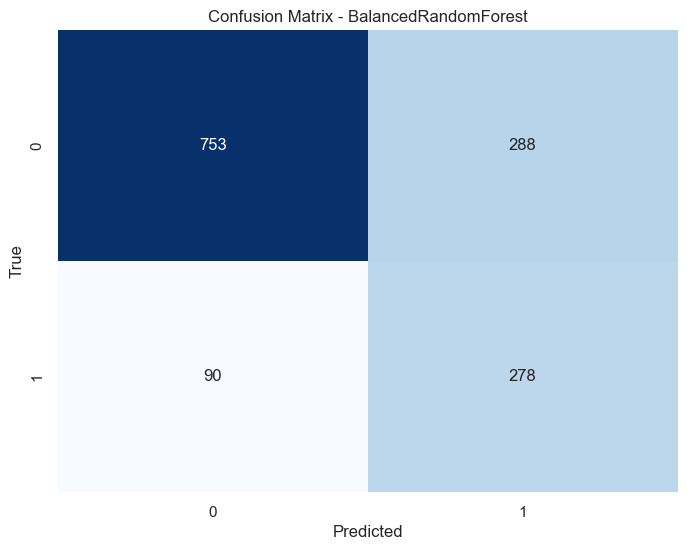

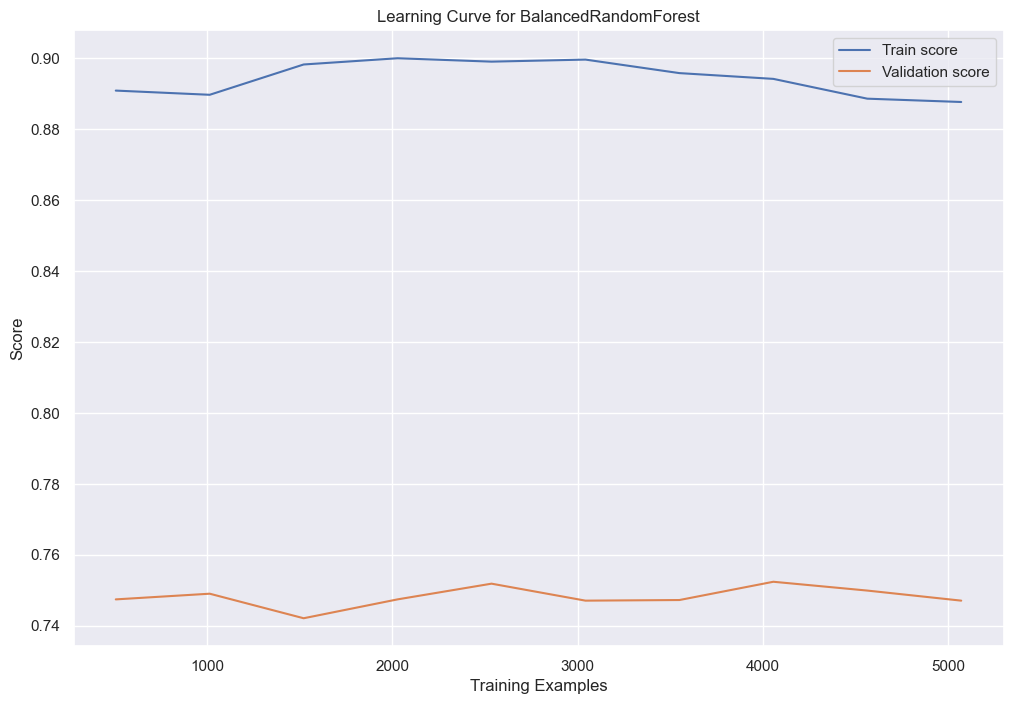

Results for BalancedBagging:

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1041
           1       0.52      0.64      0.58       368

    accuracy                           0.75      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409


Confusion Matrix:


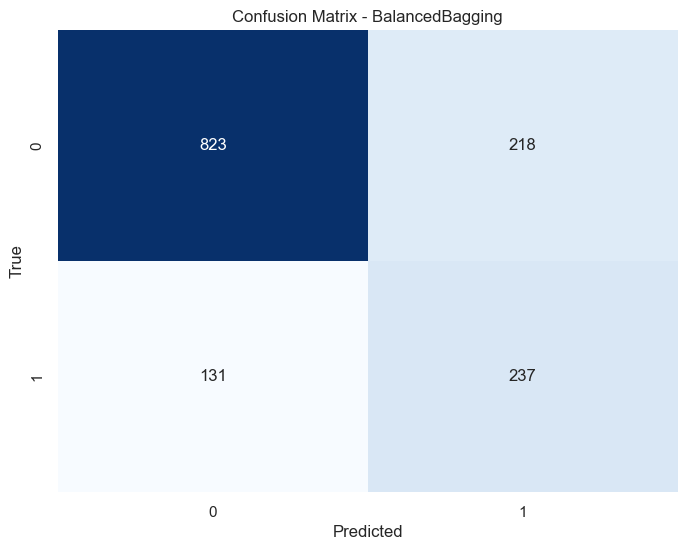

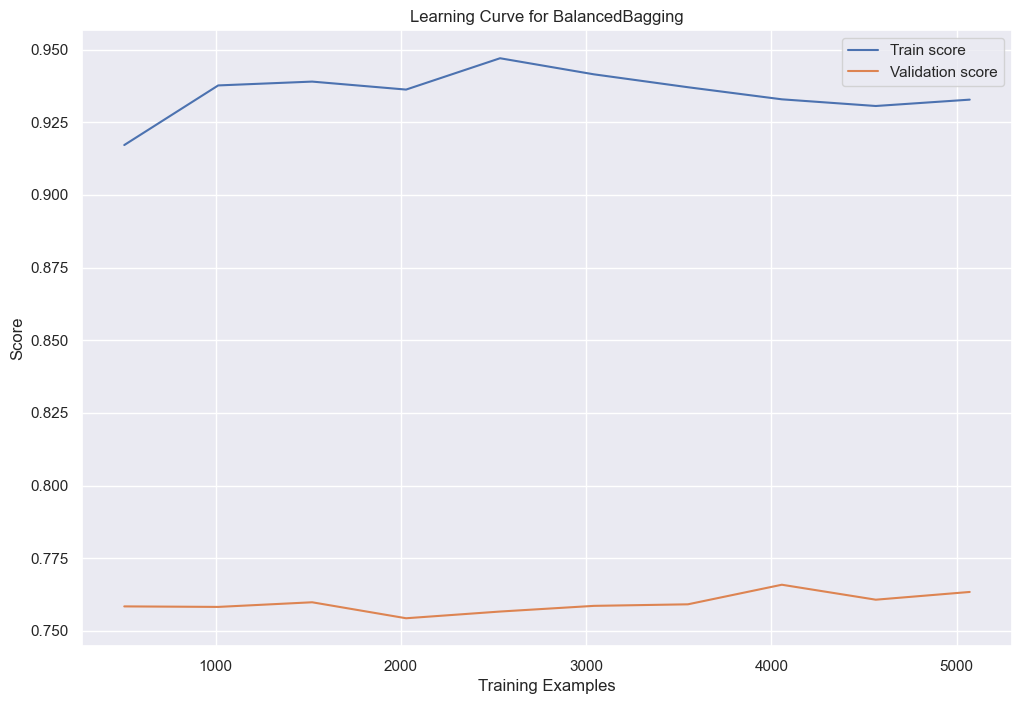

Results for SupportVector:

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1041
           1       0.50      0.76      0.60       368

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.74      0.75      1409


Confusion Matrix:


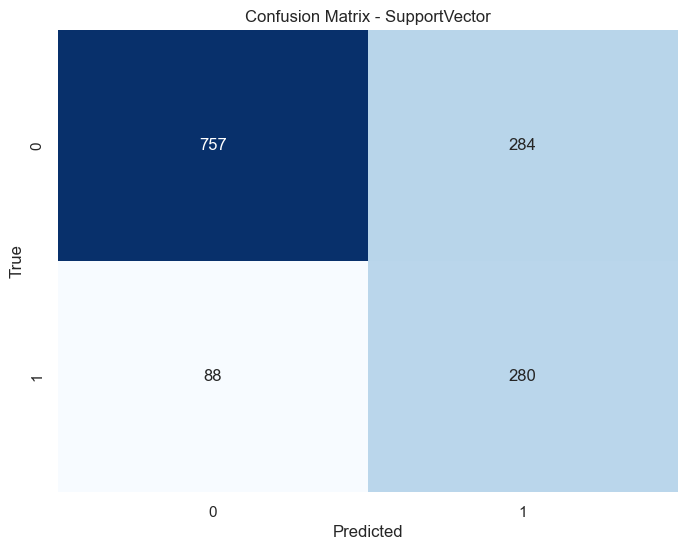

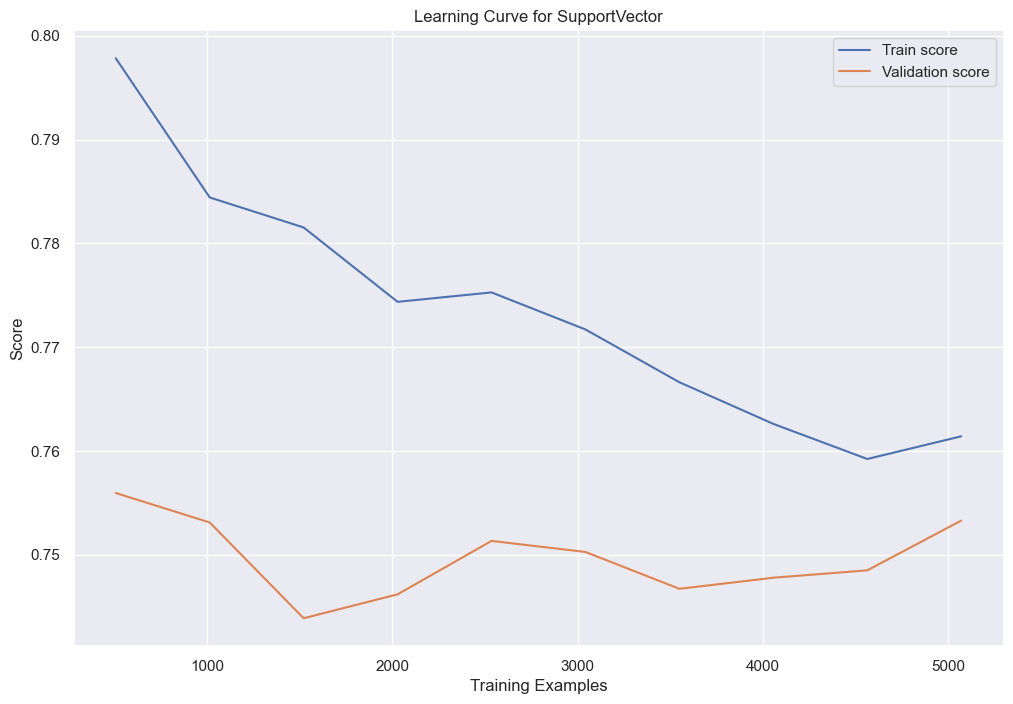

Results for LogisticRegression:

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1041
           1       0.50      0.80      0.61       368

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409


Confusion Matrix:


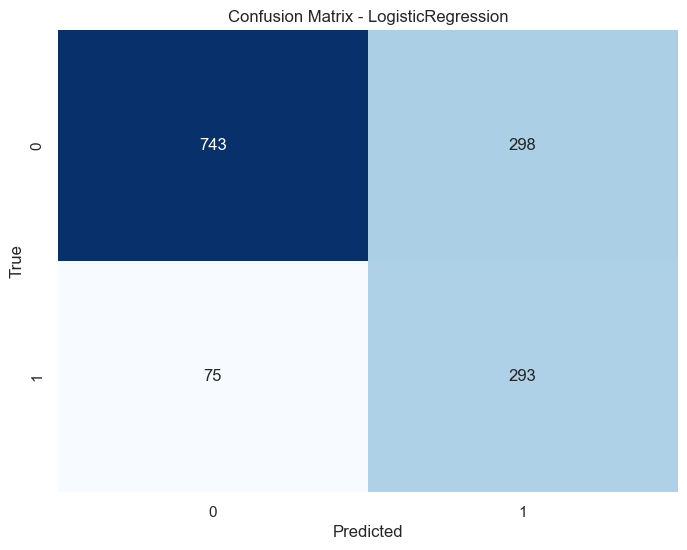

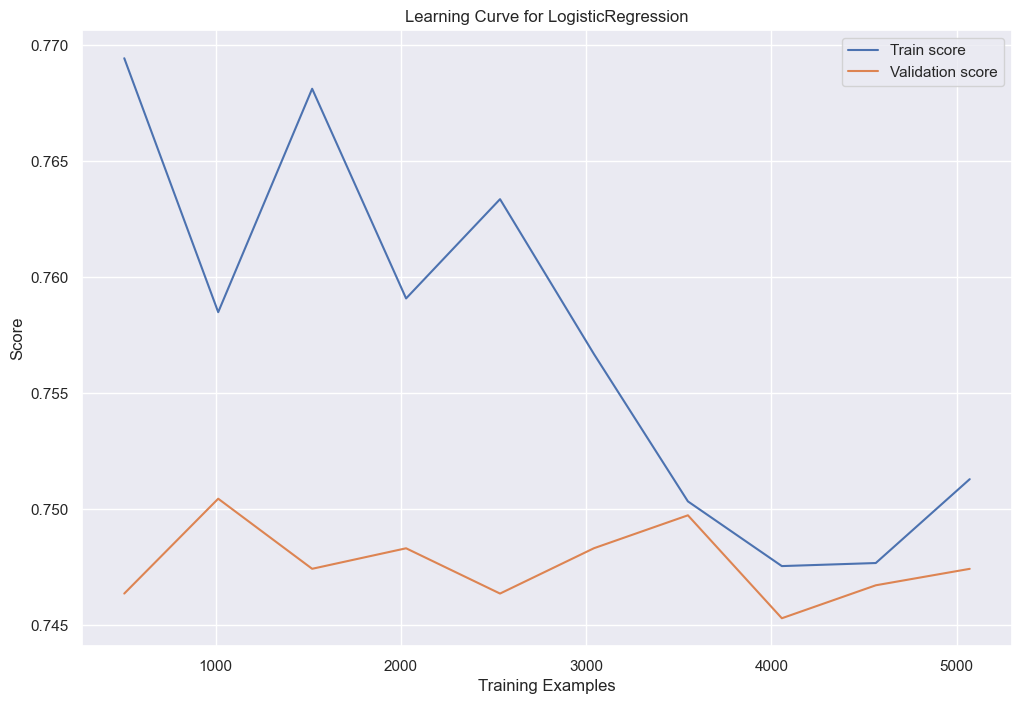

In [1057]:
# Evaluation of models and preprocessing with learning curve

# Create a preprocessor pipeline
# preprocessor = make_pipeline (PolynomialFeatures(2, include_bias=False), >> not much improvement
                              #SelectKBest(f_classif, k=20))

#Define models
EEC = make_pipeline(EasyEnsembleClassifier(random_state=0))
BRF = make_pipeline(BalancedRandomForestClassifier(random_state=0))
BBC = make_pipeline(BalancedBaggingClassifier(random_state=0))
SVM = make_pipeline(SVC(class_weight='balanced', probability=True, random_state=0))
LR = make_pipeline(LogisticRegression(class_weight='balanced', random_state=0))
#RF = RandomForestClassifier(random_state=0, class_weight = 'balanced')  >> low recall score
#AdB = AdaBoostClassifier(random_state=0)                           >> low recall score

dict_models = {
    'EasyEnsembleClassifier': EEC,
    'BalancedRandomForest': BRF,
    'BalancedBagging': BBC,
    'SupportVector': SVM,
    'LogisticRegression': LR,
    #'RandomForestClassifier': RF,
    #'AdaBoostClassifier': AdB,
    
}

for name, model in dict_models.items(): 
    evaluation(model,name)

## 3) Model tuning

### 3.1) Single model optimization

In [757]:
LR

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='deprecated', n_jobs=None,
                   penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

#### Model tuning using GridSearchCV

{'logisticregression__class_weight': 'balanced'}
Results for LogisticRegression:

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1041
           1       0.50      0.80      0.61       368

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409


Confusion Matrix:


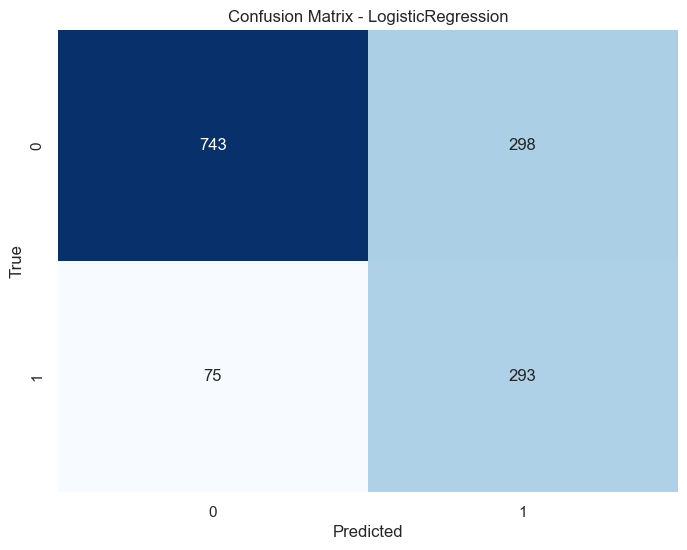

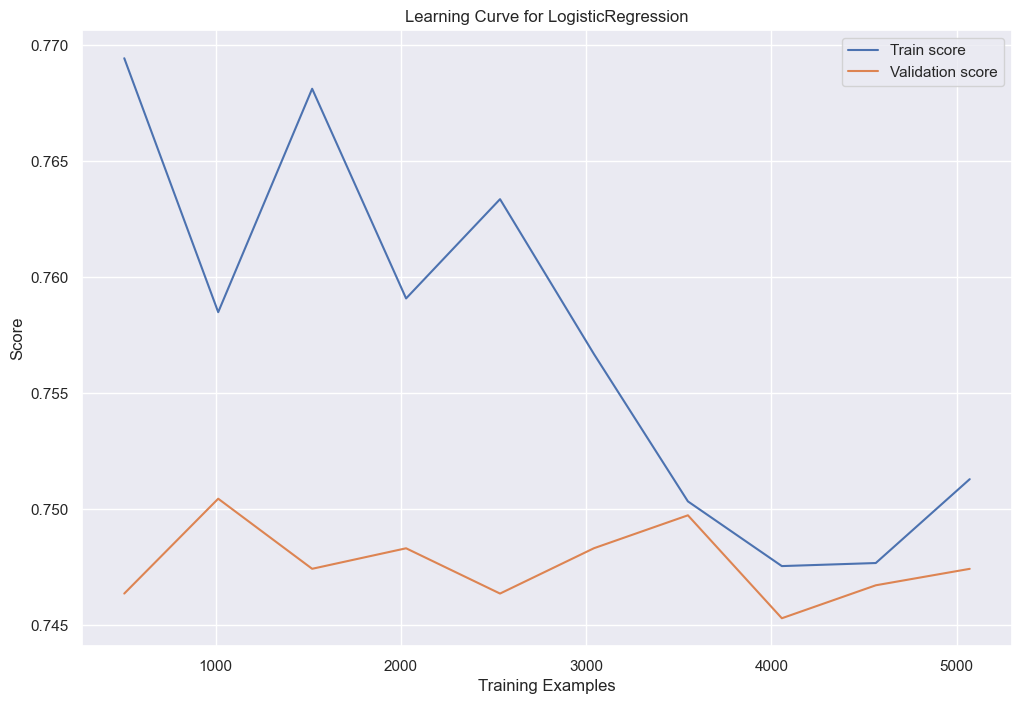

In [1096]:
# Define the pipeline
#preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), 
                             #SelectKBest(f_classif, k=5))

LR = make_pipeline(LogisticRegression(random_state=0))


# Define the parameter distributions (defaults parameters with class_weight give better results)
param_distributions = {
    #'logisticregression__C': [0.008, 0.01, 0.015],
    #'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    #'logisticregression__solver': ['liblinear', 'saga', 'lbfgs'],
    'logisticregression__class_weight': ['balanced', None],
    #'logisticregression__max_iter': [250, 300, 350],
    #'logisticregression__tol': [1e-4, 1e-3, 1e-2],
    #'pipeline__polynomialfeatures__degree': [2, 3, 4],
    #'pipeline__selectkbest__k': range(4, 100)
}

# Perform GridSearchCV
grid_rand = GridSearchCV(LR, param_distributions, scoring='recall', cv=10) 

# Fit the model
grid_rand.fit(X_train, y_train)

# Print the best parameters
print(grid_rand.best_params_)

# Predict on the test set
y_pred = grid_rand.predict(X_test)

# Evaluate the best estimator
evaluation(grid_rand.best_estimator_, LR.named_steps['logisticregression'].__class__.__name__ )

#### Decision thresholds : final adjustments

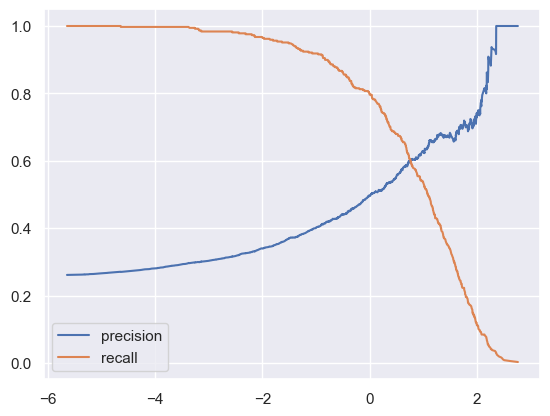

In [1055]:
# Calculate precision, recall, and decision thresholds for the model
precision, recall, threshold = precision_recall_curve(y_test, grid_rand.best_estimator_.decision_function(X_test))

# Plot precision and recall as functions of the decision threshold
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend() 
plt.show()    

In [1056]:
# Define a function to make predictions based on a custom decision threshold
def model_final(model, X, threshold=0):
    # Apply the decision function and compare it to the threshold
    return model.decision_function(X) > threshold

# Use the custom threshold to make predictions on the test set
y_pred = model_final(grid_rand.best_estimator_, X_test, threshold=-0.8)

# Print the F1 score and recall score of the predictions
print(f'f1_score: {f1_score(y_test, y_pred)}')
print(f'recall_score: {recall_score(y_test, y_pred)}')

# Save the model to a file with a specified
lr_wrapper = LogisticRegressionWrapper(grid_rand.best_estimator_, threshold=-0.8)
lr_wrapper.save_model('logistic_regression_model.pkl')

f1_score: 0.5721694036300777
recall_score: 0.8994565217391305


### 3.2) Multiple models optimization : no improvement


 RandomizedSearchCV for EasyEnsemble

 Best parameters for EasyEnsemble: {'easyensembleclassifier__estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best'), 'easyensembleclassifier__n_estimators': 129, 'easyensembleclassifier__random_state': 0, 'easyensembleclassifier__replacement': False, 'easyensembleclassifier__sampling_strategy': 'auto'}

 Best recall score for EasyEnsemble: 0.9746799116997792
Results for EasyEnsemble:

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.34      0.50      1041
           1       0.34      0.97      0.50       368

    accuracy                           0.50      1409
 

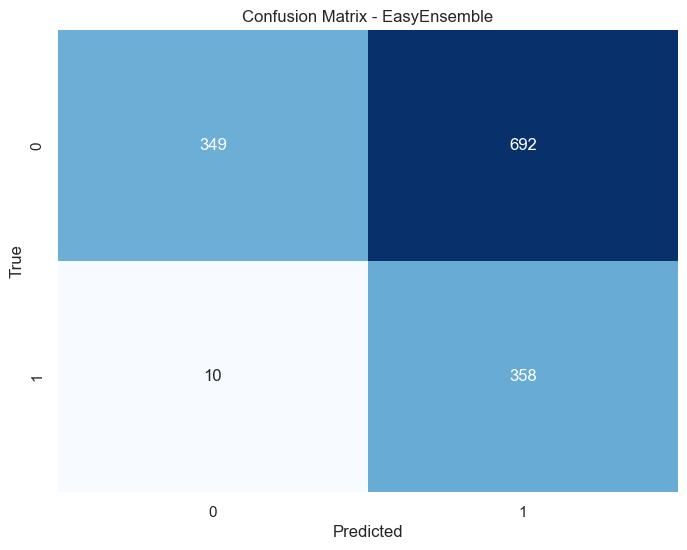

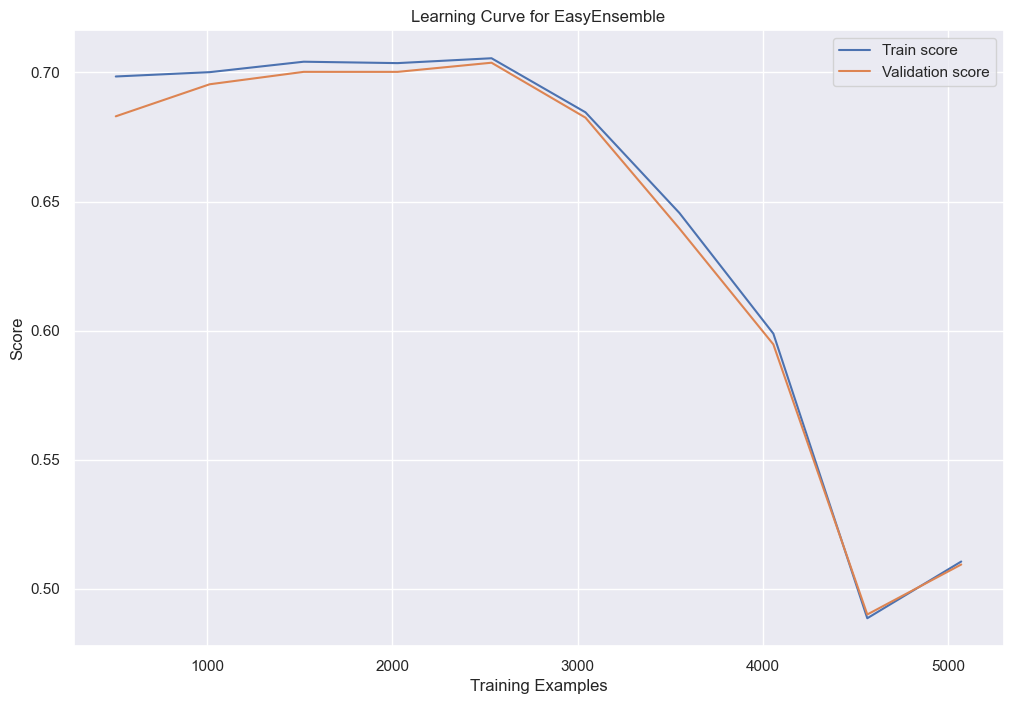

Time taken for EasyEnsemble: 185.10 seconds

 RandomizedSearchCV for BalancedRandomForest

 Best parameters for BalancedRandomForest: {'balancedrandomforestclassifier__sampling_strategy': 0.7, 'balancedrandomforestclassifier__n_estimators': 100, 'balancedrandomforestclassifier__min_samples_split': 10, 'balancedrandomforestclassifier__min_samples_leaf': 1, 'balancedrandomforestclassifier__max_features': 0.7, 'balancedrandomforestclassifier__max_depth': 3, 'balancedrandomforestclassifier__criterion': 'gini', 'balancedrandomforestclassifier__class_weight': 'balanced_subsample', 'balancedrandomforestclassifier__bootstrap': False}

 Best recall score for BalancedRandomForest: 0.9393818984547462
Results for BalancedRandomForest:

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.51      0.67      1041
           1       0.40      0.92      0.56       368

    accuracy                           0.62      1409
   macro avg       0.67  

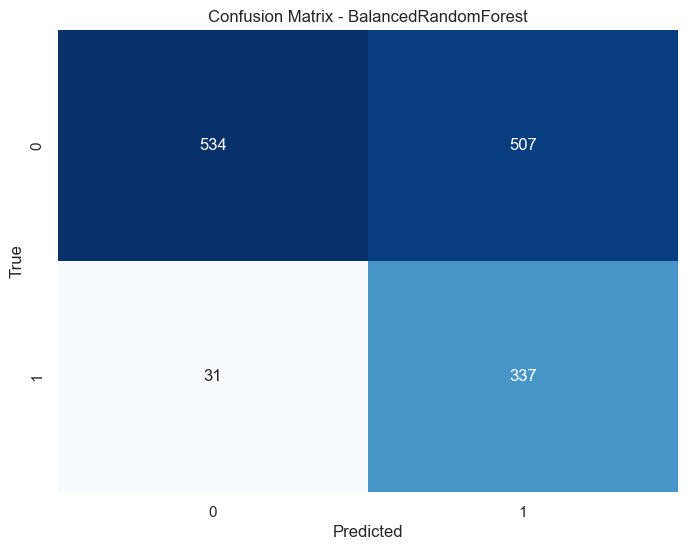

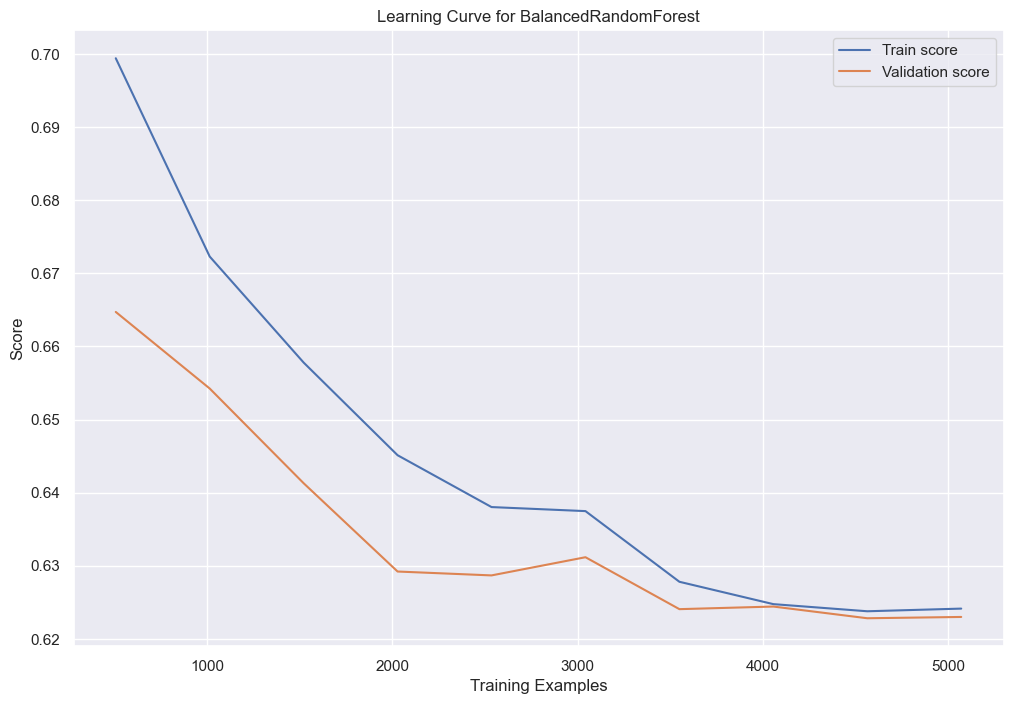

Time taken for BalancedRandomForest: 180.90 seconds

 RandomizedSearchCV for BalancedBagging

 Best parameters for BalancedBagging: {'balancedbaggingclassifier__bootstrap': True, 'balancedbaggingclassifier__bootstrap_features': True, 'balancedbaggingclassifier__estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best'), 'balancedbaggingclassifier__max_features': 0.8241410077932141, 'balancedbaggingclassifier__max_samples': 0.6496748671836832, 'balancedbaggingclassifier__n_estimators': 67, 'balancedbaggingclassifier__random_state': 0, 'balancedbaggingclassifier__replacement': False, 'balancedbaggingclassifier__sampling_strategy': 'auto'}

 Best recall score for Bala

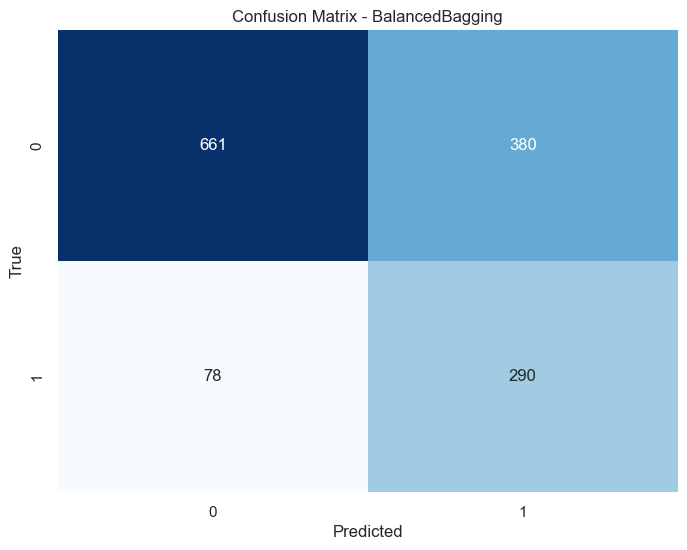

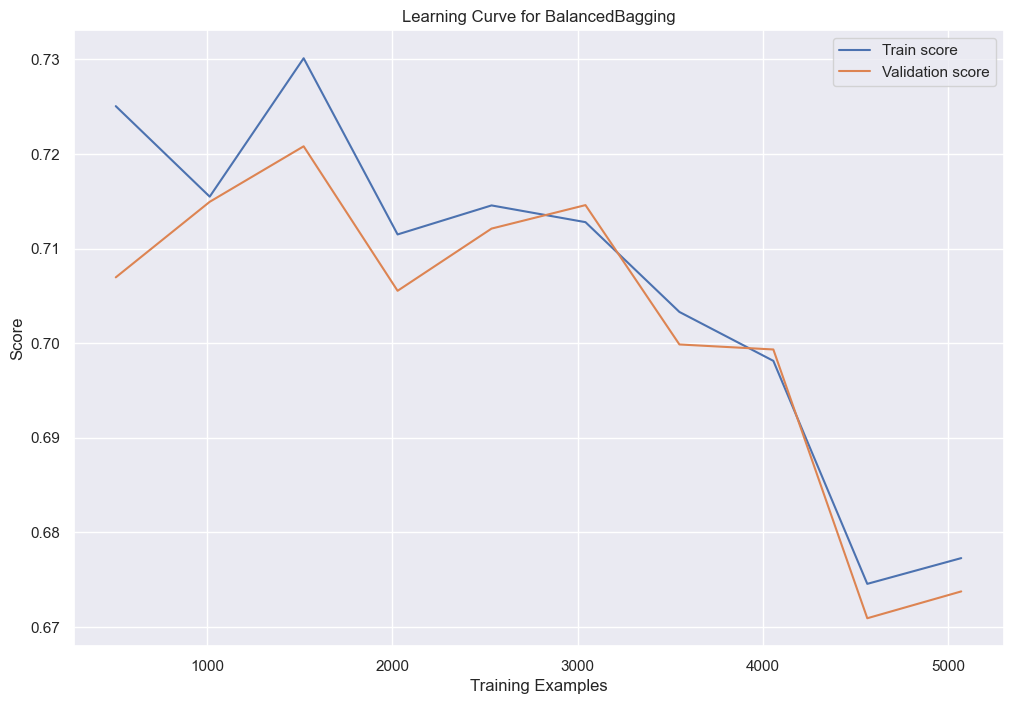

Time taken for BalancedBagging: 55.30 seconds

 RandomizedSearchCV for SVM

 Best parameters for SVM: {'svc__kernel': 'linear', 'svc__gamma': 'auto', 'svc__degree': 3, 'svc__C': 3}

 Best recall score for SVM: 0.8361147902869757
Results for SVM:

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1041
           1       0.45      0.82      0.58       368

    accuracy                           0.69      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.79      0.69      0.71      1409


Confusion Matrix:


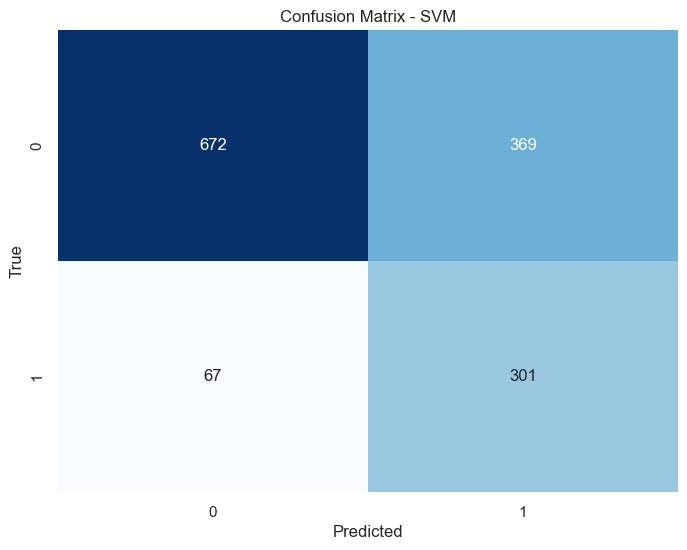

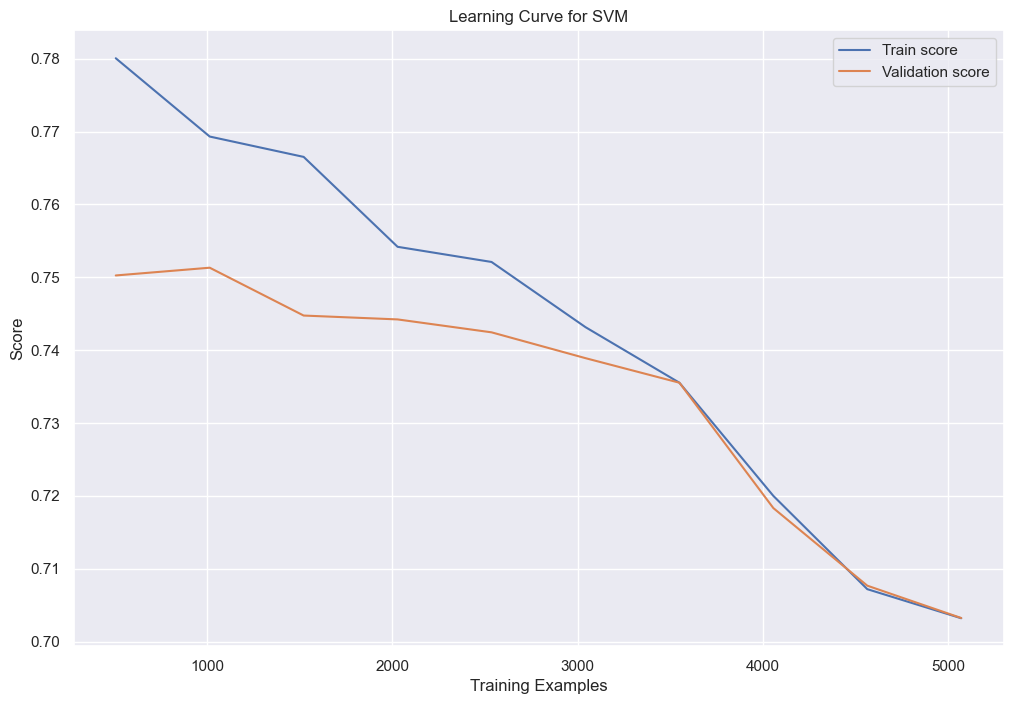

Time taken for SVM: 763.99 seconds

 RandomizedSearchCV for LogisticRegression

 Best parameters for LogisticRegression: {}

 Best recall score for LogisticRegression: 0.8001236203090508
Results for LogisticRegression:

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1041
           1       0.50      0.80      0.61       368

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409


Confusion Matrix:


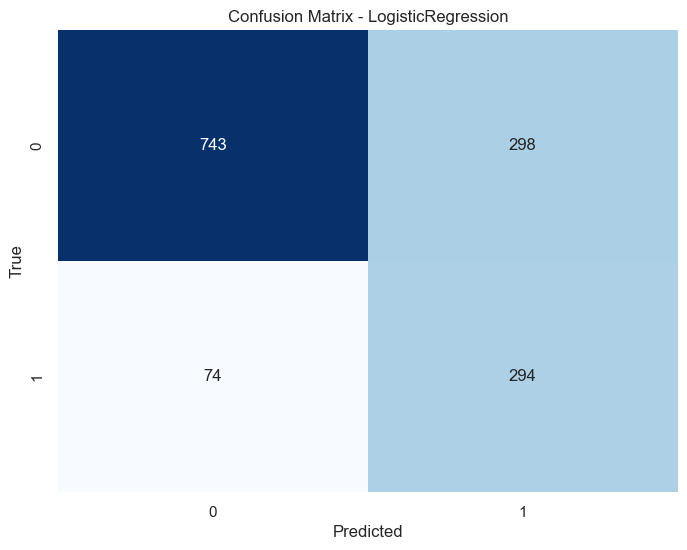

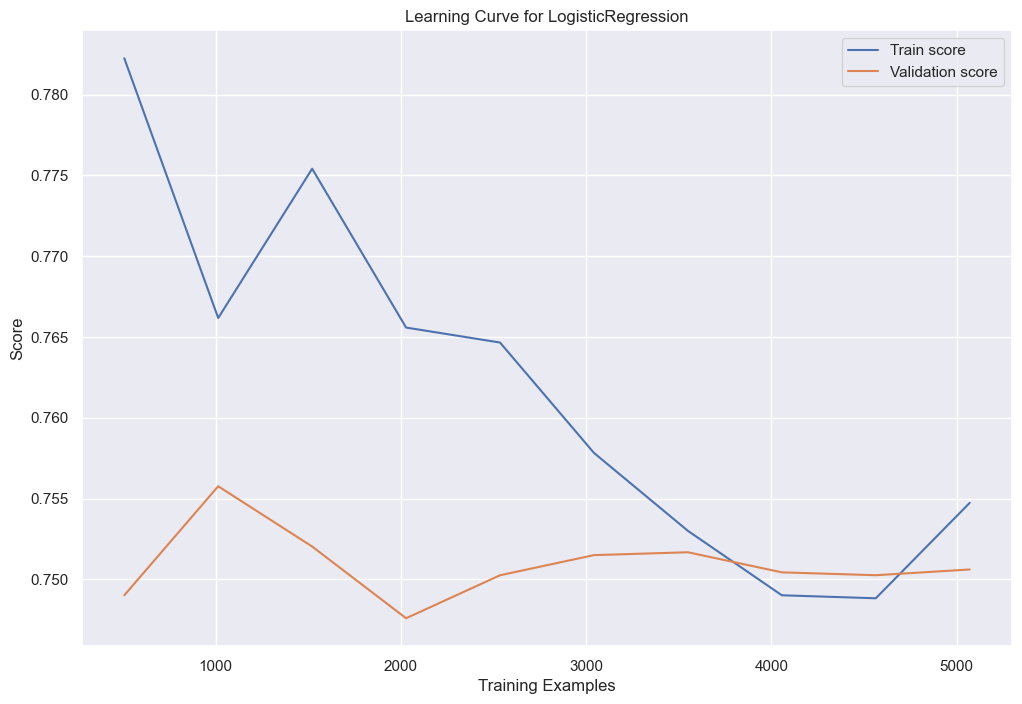

Time taken for LogisticRegression: 2.12 seconds


In [1067]:
# Define models and their hyperparameter grids
best_models = {
    'EasyEnsemble': {
       'model': make_pipeline(EasyEnsembleClassifier(random_state=0)),
       'params': {
           'easyensembleclassifier__n_estimators': randint(50, 200),
           'easyensembleclassifier__sampling_strategy': ['auto', 0.5, 0.7, 1.0],
           'easyensembleclassifier__replacement': [True, False],
           'easyensembleclassifier__random_state': [0],
           'easyensembleclassifier__estimator': [DecisionTreeClassifier(max_depth=d) for d in range(1, 11)]
        }
    },
    'BalancedRandomForest': {
        'model': make_pipeline(BalancedRandomForestClassifier(random_state=0)),
        'params': {
            'balancedrandomforestclassifier__n_estimators': [100, 150, 200],
            'balancedrandomforestclassifier__max_depth': [3, 7, 10],
            'balancedrandomforestclassifier__min_samples_split': [5, 10],
            'balancedrandomforestclassifier__min_samples_leaf': [1, 4],
            'balancedrandomforestclassifier__max_features': [0.5, 0.7],
            'balancedrandomforestclassifier__class_weight': ['balanced_subsample'],
            'balancedrandomforestclassifier__sampling_strategy': [0.7, 1.0],
            'balancedrandomforestclassifier__criterion': ['gini', 'entropy'],
            'balancedrandomforestclassifier__bootstrap': [True, False]
        }
    },
    'BalancedBagging': {
        'model': make_pipeline(BalancedBaggingClassifier(random_state=0)),
        'params': {
            'balancedbaggingclassifier__n_estimators': randint(50, 200),
            'balancedbaggingclassifier__max_samples': uniform(0.5, 1.0),
            'balancedbaggingclassifier__max_features': uniform(0.5, 1.0),
            'balancedbaggingclassifier__bootstrap': [True, False],
            'balancedbaggingclassifier__bootstrap_features': [True, False],
            'balancedbaggingclassifier__sampling_strategy': ['auto', 0.5, 0.7, 1.0],
            'balancedbaggingclassifier__replacement': [True, False],
            'balancedbaggingclassifier__random_state': [0],
            'balancedbaggingclassifier__estimator': [DecisionTreeClassifier(max_depth=d) for d in range(1, 11)]
        }
    },
    'SVM': {
        'model': make_pipeline(SVC(class_weight='balanced', probability=True, random_state=0)),
        'params': {
            'svc__C': [0.5, 0.8, 3, 3.5],
            'svc__kernel': ['linear', 'rbf'],
            'svc__gamma': ['scale', 'auto'], 
            'svc__degree': [2, 3] 
        }
    },
    'LogisticRegression': {
        'model': make_pipeline(LogisticRegression(class_weight='balanced', random_state=0)),
        'params': {
        }
    }
}

# Dictionary to store the best estimators for ensemble learning
best_estimators = {}

# Loop through the models and perform RandomizedSearchCV
for name, model_info in best_models.items():
    start_time = time.time()
    print(f"\n RandomizedSearchCV for {name}")
    
    grid = RandomizedSearchCV(model_info['model'], model_info['params'], scoring='recall', cv=10, n_iter=10, random_state=0)
    grid.fit(X_train, y_train)
    
    print(f"\n Best parameters for {name}: {grid.best_params_}")
    print(f"\n Best recall score for {name}: {grid.best_score_}")
    
    y_pred = grid.predict(X_test)
    #print(f"Classification report for {name}:\n{classification_report(y_test, y_pred)}") 
    evaluation(grid.best_estimator_, name)
    
    # Store the best estimator in the dictionary
    best_estimators[name] = grid.best_estimator_

    print(f"Time taken for {name}: {time.time() - start_time:.2f} seconds")


#### Ensemble Learning

##### Voting Ensemble (hard) : no improvement

In [1098]:
# List of tuples (name, best_estimator) for VotingClassifier
estimators_ensemble = [(name, model) for name, model in best_estimators.items()]

# Initialize VotingClassifier with voting='hard'
voting_model_h = VotingClassifier(estimators=estimators_ensemble, voting='hard')
voting_model_h.fit(X_train, y_train)

# Evaluate VotingClassifier
y_pred_voting = voting_model_h.predict(X_test)
print("Voting Classifier Evaluation:")
print(classification_report(y_test, y_pred_voting))

Voting Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.56      0.70      1041
           1       0.42      0.90      0.57       368

    accuracy                           0.64      1409
   macro avg       0.68      0.73      0.63      1409
weighted avg       0.80      0.64      0.66      1409



##### Voting Ensemble (soft) : no improvement 

In [1099]:
# List of tuples (name, best_estimator) for VotingClassifier
estimators_ensemble = [(name, model) for name, model in best_estimators.items()]

# Initialize VotingClassifier with voting='hard'
voting_model = VotingClassifier(estimators=estimators_ensemble, voting='soft')
voting_model.fit(X_train, y_train)

# Evaluate VotingClassifier
y_pred_voting = voting_model.predict(X_test)
print("Voting Classifier Evaluation:")
print(classification_report(y_test, y_pred_voting))

Voting Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1041
           1       0.47      0.80      0.60       368

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.73      1409



##### Stacking Ensemble : no improvement

In [944]:
# List of tuples (name, best_estimator) for StackingClassifier
estimators_ensemble = [(name, model) for name, model in best_estimators.items()]

# Define final estimator for stacking
final_estimator = LogisticRegression(class_weight='balanced', random_state=0)

# Initialize the StackingClassifier
stacking_model = StackingClassifier(estimators=estimators_ensemble, final_estimator=final_estimator)
stacking_model.fit(X_train, y_train)

# Evaluate StackingClassifier
y_pred_stacking = stacking_model.predict(X_test)
print("Stacking Classifier Evaluation:")
print(classification_report(y_test, y_pred_stacking))

Stacking Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1041
           1       0.50      0.79      0.61       368

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



#### Ensemble Learning with RandomizedSearchCV

##### Voting Ensemble: no improvement

In [946]:
# List of tuples (name, best_estimator) for VotingClassifier
estimators_ensemble = [(name, model) for name, model in best_estimators.items()]

# Initialize VotingClassifier with voting='hard' and RandomizedSearchCV
voting_model = VotingClassifier(estimators=estimators_ensemble)

# Perform a randomized search on the weights for VotingClassifier
param_grid_voting = {
    'weights': [[1,1,1,1,1], [1,2,1,1,1], [1,1,2,1,1], [1,1,1,2,1], [1,1,1,1,2]],
    'voting': ['hard', 'soft']
}

# Train VotingClassifier
voting_grid_hard = RandomizedSearchCV(voting_model, param_grid_voting, scoring='recall', cv=10, n_iter=10)
voting_grid_hard.fit(X_train, y_train)

# Evaluate VotingClassifier
y_pred_voting = voting_grid_hard.predict(X_test)
print("Best parameters for VotingClassifier:")
print(voting_grid_hard.best_params_)
print("Voting Classifier Evaluation:")
print(classification_report(y_test, y_pred_voting))

Best parameters for VotingClassifier:
{'weights': [1, 1, 1, 1, 1], 'voting': 'hard'}
Voting Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.60      0.73      1041
           1       0.44      0.87      0.58       368

    accuracy                           0.67      1409
   macro avg       0.68      0.74      0.66      1409
weighted avg       0.80      0.67      0.69      1409



##### Stacking Ensemble using LR: no improvement

In [909]:
# List of tuples (name, best_estimator) for StackingClassifier
estimators_ensemble = [(name, model) for name, model in best_estimators.items()]

# Define final estimator for stacking
final_estimator = LogisticRegression(random_state=0)

# Initialize the StackingClassifier
stacking_model = StackingClassifier(estimators=estimators_ensemble, final_estimator=final_estimator)

# Define the parameter grid for RandomizedSearchCV
param_grid_stacking = {
    'final_estimator__C': [0.1, 1.0, 10.0],
    'final_estimator__penalty': ['l2'],
    'final_estimator__solver': ['lbfgs'],
    'final_estimator__class_weight': ['balanced', None]
}

# Perform a randomized search on the parameters for StackingClassifier
stacking_grid = RandomizedSearchCV(stacking_model, param_grid_stacking, scoring='recall', cv=10, n_iter=5, random_state=0, n_jobs=-1)
stacking_grid.fit(X_train, y_train)

# Evaluate StackingClassifier
y_pred_stacking = stacking_grid.predict(X_test)
print("Best parameters for StackingClassifier:")
print(stacking_grid.best_params_)
print("Stacking Classifier Evaluation:")
print(classification_report(y_test, y_pred_stacking))

/opt/anaconda3/envs/ML-IA/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/envs/ML-IA/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/envs/ML-IA/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviou

Best parameters for StackingClassifier:
{'final_estimator__solver': 'lbfgs', 'final_estimator__penalty': 'l2', 'final_estimator__class_weight': 'balanced', 'final_estimator__C': 0.1}
Stacking Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1041
           1       0.50      0.78      0.61       368

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.74      0.75      1409

